# Assignment 4 Part 2

In this question, you need to use Python code to conduct a simple linear regression analysis. You need to follow the tutorial to analyze one independent variable `avg_speed`. Then, you will need conduct simple linear regression analysis to analyze for a new independent variable `normalized_volume`. 

# Tutorial part (Read and Run)

## Data Description

The data is downloaded from the [Gutenberg Open Project](https://www.gutenberg.org/), which is one of the largest open libraries for literary texts. This dataset includes a subset of books that is about stories, such as literature and novels. 

| Column | Description|
|--------| -----------|
|id	|Gutenberg Project id|
|title	|Title of the book|
|author|Author of the book|
|authoryearofbirth | The year of birth for the author|
|avg_speed |	The average speed of the book measuring how fast or slow the stories goes using method [here](https://doi.org/10.1073/pnas.2011695118)|
|normalized_volume | The scope of the story measuring how much content does the story covers using method [here](https://doi.org/10.1073/pnas.2011695118)|
|cirtuitous | the circuitousness of the story using method [here](https://doi.org/10.1073/pnas.2011695118)|
|genre_\*| the dummy coded genre of the book|
|log_downloads |	Log transformed number of downloads of the book|

## Step 1 load the data

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tools.tools import add_constant
from scipy import stats

In [26]:
df = pd.read_csv("./gutenberg_data.csv")
df = df.dropna()
df.shape

(7246, 27)

## Scatterplot and regression line

We will first consider the average speed as the independent variable, and the number of downloads as the dependent variable. First, let's plot the scatterplot and the regression model.

<Axes: xlabel='avg_speed', ylabel='log_downloads'>

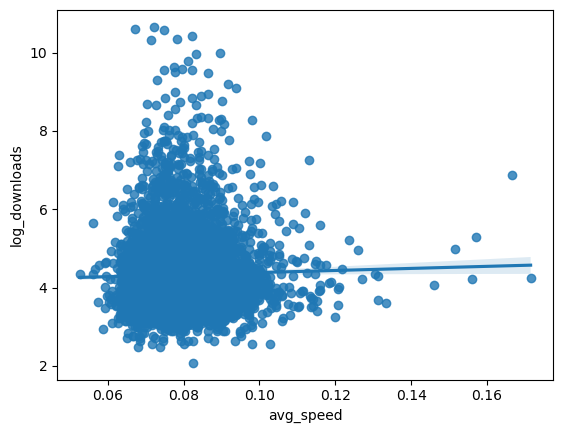

In [16]:
sns.regplot(data=df, x="avg_speed", y="log_downloads")

## Simple linear model using `statsmodel` package

In [20]:
import statsmodels.api as sm

### First we construct the design matrix

In [27]:
X = df["avg_speed"]
X = sm.add_constant(X)
X.head()

,const,avg_speed
0,1.0,0.078228
1,1.0,0.087940
2,1.0,0.085309
3,1.0,0.082234
4,1.0,0.068605


### Next we extract the response vector

In [28]:
Y = df["log_downloads"]

### We estimate the regression model using OLS method

In [29]:
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_downloads   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.175
Date:                Thu, 10 Apr 2025   Prob (F-statistic):             0.0229
Time:                        23:02:50   Log-Likelihood:                -8992.4
No. Observations:                7246   AIC:                         1.799e+04
Df Residuals:                    7244   BIC:                         1.800e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1202      0.092     44.603      0.000       3.939       4.301
avg_speed      2.6357      1.159      2.275      0.023       0.364       4.907
==============================================================================
Omnibus:                     3350.244   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24778.211
Skew:                           2.076   Prob(JB):                         0.00
Kurtosis:                      11.052   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Run regression model diagnostic

### Testing normality using shapiro test

In [50]:
from scipy import stats
residuals = results.resid
stats.shapiro(residuals)

ShapiroResult(statistic=0.990784485059682, pvalue=2.5431977682881082e-21)

The p value is less than 0.05, thus it violated the normality test. 

### Visualize normality using qq plot

<Axes: ylabel='Count'>

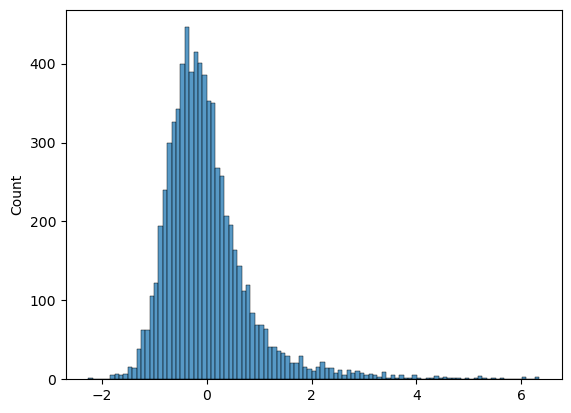

In [42]:
sns.histplot(residuals)

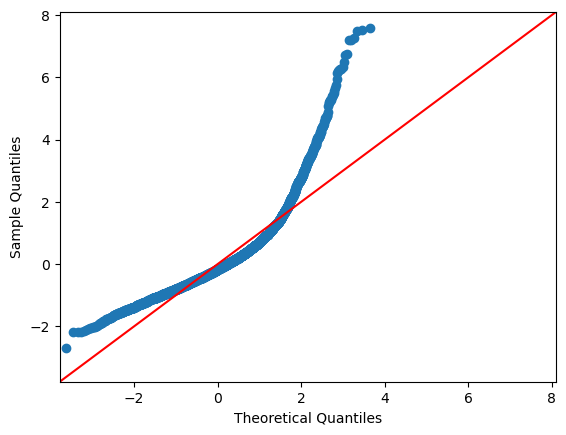

In [43]:
fig = sm.qqplot(residuals, fit=True, line="45")
plt.show()

The distribution of the residuals is **right-skewed**.

To address this problem, we can transform the dependent variable. 

One solution is to use the box-cox transformation. 

In [45]:
Y_transformed, lambda_value = stats.boxcox(Y)

print("Transformed data:", Y_transformed)
print("Lambda value:", lambda_value)

Transformed data: [0.65509818 0.64240221 0.63386781 ... 0.67795927 0.64904542 0.65886982]
Lambda value: -1.272614276749364


In [47]:
results_transformed = sm.OLS(Y_transformed, X).fit()
results_transformed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.657
Date:                Thu, 10 Apr 2025   Prob (F-statistic):             0.0310
Time:                        23:15:50   Log-Likelihood:                 16160.
No. Observations:                7246   AIC:                        -3.232e+04
Df Residuals:                    7244   BIC:                        -3.230e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6525      0.003    227.283      0.000       0.647       0.658
avg_speed      0.0777      0.036      2.158      0.031       0.007       0.148
==============================================================================
Omnibus:                      188.994   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.353
Skew:                          -0.072   Prob(JB):                     1.19e-97
Kurtosis:                       4.207   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='avg_speed'>

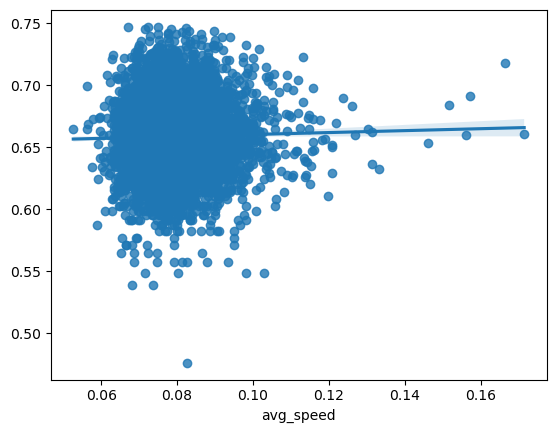

In [51]:
sns.regplot(data=df, x="avg_speed", y=Y_transformed)

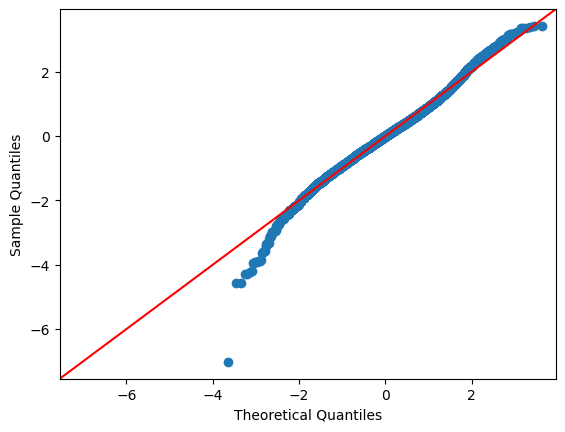

In [49]:
residuals_transformed = results_transformed.resid
fig = sm.qqplot(residuals_transformed, fit=True, line="45")
plt.show()

The normality problem is improved by a lot.

## Plot the fitted-residual plot to check linearity

In [54]:
fitted_transformed = results_transformed.fittedvalues

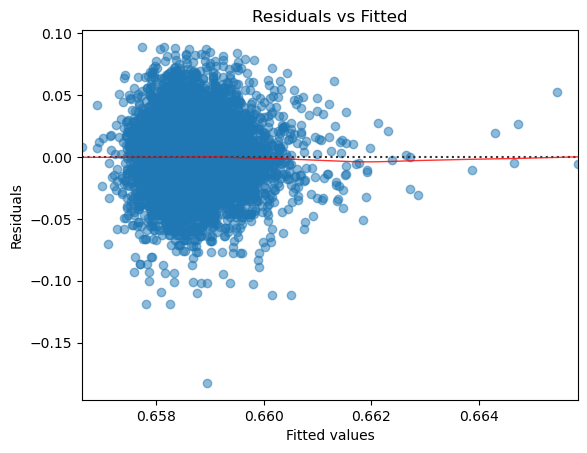

In [64]:
sns.residplot(x=fitted_transformed, y=residuals_transformed, 
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

The linearity looks fine. But it appears that there exists outlying data. 

### Use the Scale-location plot to check constant variance assumption

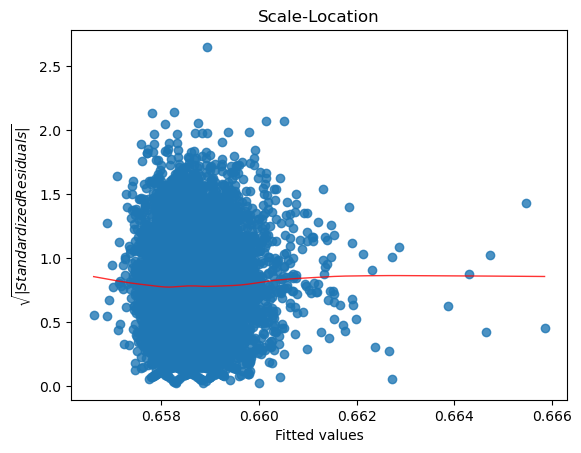

In [69]:
model_norm_residuals = results_transformed.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

sns.regplot(x=fitted_transformed,y= model_norm_residuals_abs_sqrt,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel('$\sqrt{|Standardized Residuals|}$');

The constant variance also looks fine.

### Outlying data

### Check High leverage data against standardized residuals

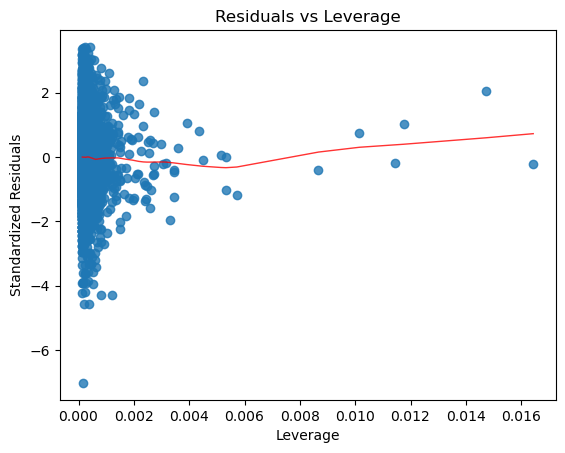

In [74]:
model_leverage = results_transformed.get_influence().hat_matrix_diag


sns.regplot(x=model_leverage, y=model_norm_residuals,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
# plt.xlim(0, max(model_leverage)+0.01)
# plt.ylim(-3, 5)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals');

We have very high leverage data, that is outlying data for our independent variable. Now lets check for outlying data for our model. We access the cooks' D.

In [85]:
model_cooks = results_transformed.get_influence().cooks_distance[0]
print(model_cooks.max())
df["model_cooks_model_1"] = model_cooks
print(df[df.model_cooks_model_1 > 0.1].shape)

0.03115938496130947
(0, 28)


We do not have any outlying data for our model. This indicates none of the data points impact our model fitting a lot.

# Assignment part (Write and run)

You have just analyzed the regression model for `avg_speed` variable. 

Now, in the following part, you will analyze the simple linear regression model for a new variable, `normalized_volume`. 

Make sure that you have pulled out the regression results and run the diagonistic analysis for the regression model. 

After you have completed this part, save this file and submit. 